In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_csv("/content/diabetespred.csv"))
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
X = df.drop(columns=['diabetes'],axis=1)

In [4]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [5]:
y = df['diabetes']

In [6]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [7]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns # here we have taken all the numerical features excluding any object tupe
cat_features = X.select_dtypes(include="object").columns # here we have taken all the categorical features including any object type

from sklearn.preprocessing import OneHotEncoder, StandardScaler # coloumns transformer is actually combining OneHotEncoder and StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler() #initialized StandardScaler
oh_transformer = OneHotEncoder() # initialized OneHotEncoder

preprocessor = ColumnTransformer( #responsible for transforming your datapoints or columns
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features), # StandardScaler is happening by using this numeric_transformer and this will be applied only for  num_features
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(100000, 15)

# TRAIN TEST SPLIT

In [10]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape # 80000 records are there in training and 200000 records in my test

((80000, 15), (20000, 15))

In [11]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.preprocessing import OrdinalEncoder # To rank categorical features
# Pipeline
from sklearn.pipeline import Pipeline #To add everything together
from sklearn.compose import ColumnTransformer # Combine everything together

In [12]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [13]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
regression.coef_

array([-5.21138689e+10, -5.21138689e+10, -5.21138689e+10,  2.29158859e+12,
        2.29158859e+12,  2.29158859e+12,  2.29158859e+12,  2.29158859e+12,
        2.29158859e+12,  3.04045677e-02,  2.51719952e-02,  2.26154327e-02,
        2.68621445e-02,  8.61403942e-02,  9.36119556e-02])

In [15]:
regression.intercept_

-2239474716308.83

In [16]:
import numpy as np
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=model_evaluation(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print('*'*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 0.22632768430130348
MAE: 0.1545810546875
R2 score 34.41775306594085
***********************************


Lasso
Model Training Performance
RMSE: 0.27947645696909784
MAE: 0.15579908000000003
R2 score -0.00032007440065040527
***********************************


Ridge
Model Training Performance
RMSE: 0.2262281025487893
MAE: 0.15456354944064524
R2 score 34.47545133969634
***********************************




In [20]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [21]:
from catboost import CatBoostRegressor

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2247
- Mean Absolute Error: 0.1536
- R2 Score: 0.3499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2263
- Mean Absolute Error: 0.1546
- R2 Score: 0.3442


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2787
- Mean Absolute Error: 0.1554
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.1558
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2247
- Mean Absolute Error: 0.1536
- R2 Score: 0.3501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2262
- Mean Absolute Error: 0.1546
- R2 Score: 0.3448


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1472
- Mean Absolute Error: 0.0433
- R2 Score: 0.7210
----------------------

**RESULTS**

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.710923
6,XGBRegressor,0.704363
5,Random Forest Regressor,0.675398
8,AdaBoost Regressor,0.661599
3,K-Neighbors Regressor,0.579089
4,Decision Tree,0.392240
2,Ridge,0.344755
0,Linear Regression,0.344178
1,Lasso,-0.000003


# Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 34.42


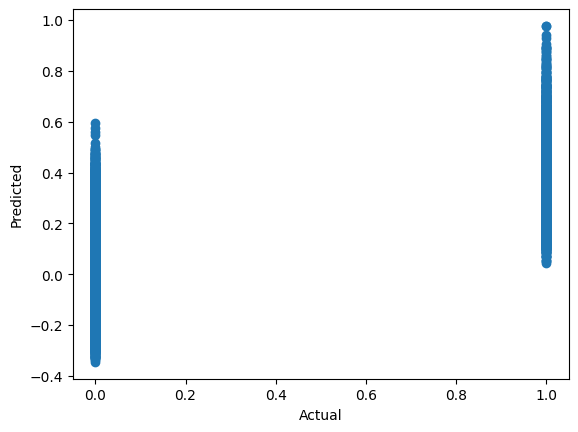

In [26]:
plt.scatter(y_test,y_pred); # Plot y_pred and y_test
plt.xlabel('Actual');
plt.ylabel('Predicted');

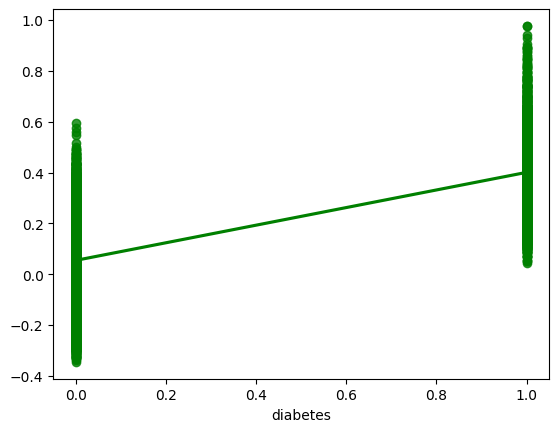

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df # Difference between Actual and Predicted Values

,Actual Value,Predicted Value,Difference
75721,0,-0.010254,0.010254
80184,0,-0.043945,0.043945
19864,0,0.102539,-0.102539
76699,0,-0.009277,0.009277
92991,1,0.322754,0.677246
...,...,...,...
32595,0,0.153809,-0.153809
29313,0,0.009766,-0.009766
37862,0,-0.073730,0.073730
53421,0,0.230469,-0.230469
